In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from numpy import array
from PIL import Image


def ft_load(path: str) -> array:
    """loads a image on an array and returns it

    Args:
        path (str): path where image is

    Returns:
        np.array: image
    """
    try:
        img = plt.imread(path)
        print(f"The shape of image is: {img.shape}")
        return img
    except Exception as e:
        print(f"Error: {e}")

The shape of image is: (768, 1024, 3)
<PIL.Image.Image image mode=RGB size=1024x768 at 0x7760FC923E20>
new shape: (768, 1024)


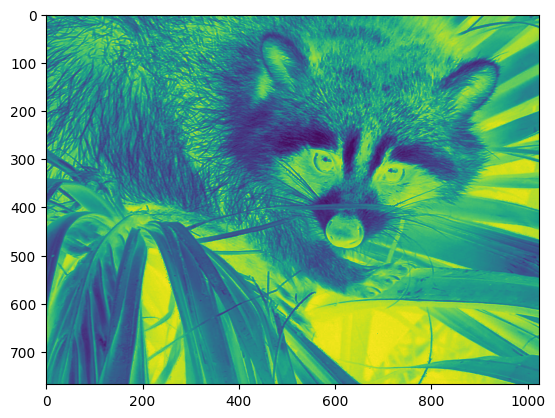

In [18]:
path = "ex03/animal.jpeg"
img = ft_load(path)
img_pil = Image.fromarray((img * 255).astype(np.uint8))  # Converte para uint8 se necessário
print(img_pil)
img_gray = img_pil.convert('L')
img_gray_array = np.array(img_gray)
plt.imshow(img_gray_array)
print(f"new shape: {img_gray_array.shape}")

In [4]:
with Image.open(path) as image:
    image.load()
gray_image = image.convert('L')
gray_image.show()

In [ ]:
ar_img = np.array(gray_image)
gray_img_from_array = Image.fromarray(ar_img[100:500, 450:850])
gray_img_from_array.show(gray_img_from_array)

new shape = (768, 1024)
116


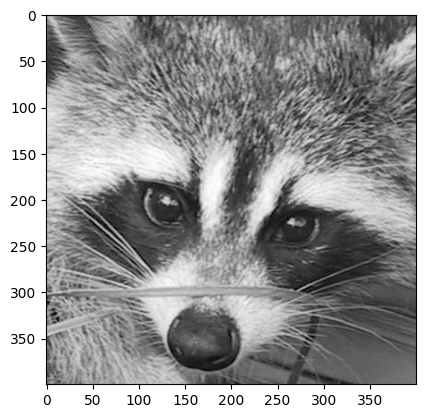

In [19]:
with Image.open(path) as image:
    image.load()
gray = image.convert('L')
gray2 = array(gray)
# c_img = ft_load(path)
# gray = np.mean(c_img, axis=2)
# gray = 0.2989 * c_img[:, :, 0] + 0.5870 * c_img[:, :, 1] + 0.1140 * c_img[:, :, 2]
# gray_img = np.expand_dims(gray, axis=-1)
print(f"new shape = {gray2.shape}")
print(gray2[0, 0]) 
plt.imshow(gray2[100:500, 450:850], cmap='gray')

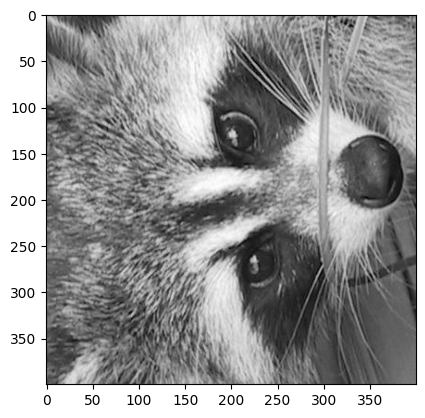

In [20]:
cut_image = array(gray)[100:500, 450:850]
cut_image.shape
plt.imshow(cut_image.T, cmap='gray')

In [30]:
def apply_color_filter(image_array, filter_type):
    if filter_type == 'invert':
        return 255 - image_array
    elif filter_type == 'red':
        filtered_image = image_array.copy()
        filtered_image[:, :, 1] = 0
        filtered_image[:, :, 2] = 0
        return filtered_image
    elif filter_type == 'green':
        filtered_image = image_array.copy()
        filtered_image[:, :, 0] = 0
        filtered_image[:, :, 2] = 0
        return filtered_image
    elif filter_type == 'blue':
        filtered_image = image_array.copy()
        filtered_image[:, :, 0] = 0
        filtered_image[:, :, 1] = 0
        return filtered_image
    elif filter_type == 'gray':
        gray_image = (0.2989 * image_array[:, :, 0] + 
                      0.5870 * image_array[:, :, 1] + 
                      0.1140 * image_array[:, :, 2]).astype(np.uint8)
        return gray_image
    else:
        raise ValueError(f"Filtro desconhecido: {filter_type}")


The shape of image is: (257, 450, 3)
[[[19 42 83]
  [23 42 84]
  [28 43 84]
  ...
  [69 42 51]
  [68 41 46]
  [68 41 46]]

 [[20 43 84]
  [24 43 85]
  [28 43 84]
  ...
  [71 44 53]
  [71 42 47]
  [71 42 47]]

 [[22 44 85]
  [25 44 84]
  [30 45 86]
  ...
  [74 44 54]
  [72 43 48]
  [72 43 48]]

 ...

 [[ 1  0  5]
  [ 1  0  5]
  [ 1  0  5]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  0  5]
  [ 1  0  5]
  [ 1  0  5]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  4]
  [ 0  0  4]
  [ 0  0  4]
  ...
  [ 0  0  0]
  [ 1  1  1]
  [ 1  1  1]]]


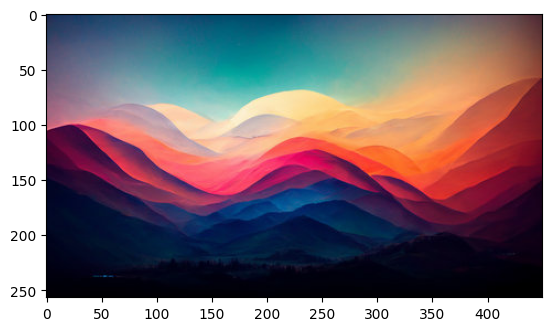

In [ ]:
img = ft_load("ex05/landscape.jpg")
print(img)
plt.imshow(img)


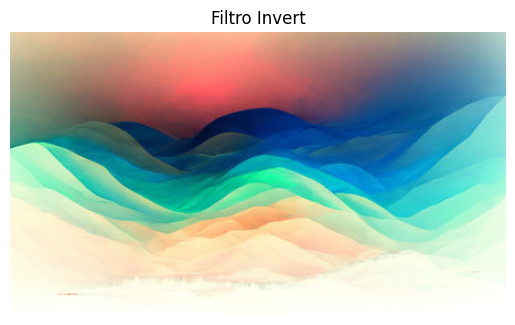

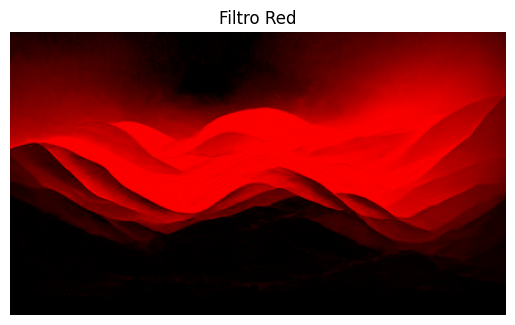

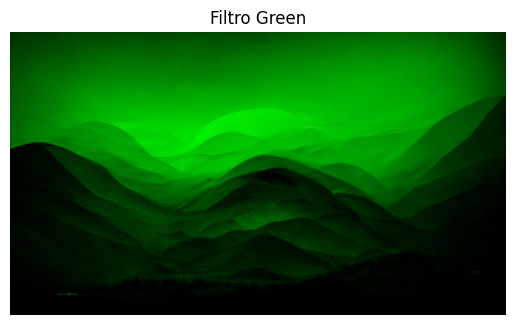

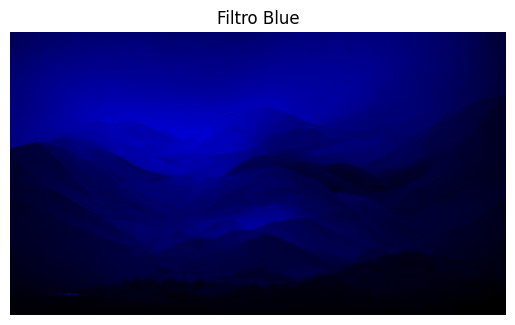

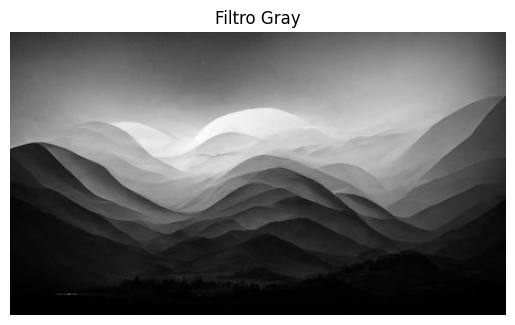

In [33]:
# Lista de filtros para aplicar
filters = ['invert', 'red', 'green', 'blue', 'gray']

for f in filters:
    filtered_image = apply_color_filter(img, f)
    
    # Ajustar parâmetros de exibição para grayscale
    if f == 'gray':
        plt.imshow(filtered_image, cmap='gray')
    else:
        plt.imshow(filtered_image)
    
    plt.axis('off')
    plt.title(f'Filtro {f.capitalize()}')
    plt.show()